<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузите-данные-и-подготовьте-их-к-анализу" data-toc-modified-id="Загрузите-данные-и-подготовьте-их-к-анализу-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузите данные и подготовьте их к анализу</a></span></li><li><span><a href="#Задайте-функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии" data-toc-modified-id="Задайте-функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Маркетинг</a></span></li><li><span><a href="#Оцените-окупаемость-рекламы" data-toc-modified-id="Оцените-окупаемость-рекламы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Оцените окупаемость рекламы</a></span></li><li><span><a href="#Напишите-выводы" data-toc-modified-id="Напишите-выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Напишите выводы</a></span></li></ul></div>

#  Исследование эффективности привлечения пользователей мобильного приложения
Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
лог сервера с данными об их посещениях,
выгрузка их покупок за этот период,
рекламные расходы.
Вам предстоит изучить:
откуда приходят пользователи и какими устройствами они пользуются,
сколько стоит привлечение пользователей из различных рекламных каналов;
сколько денег приносит каждый клиент,
когда расходы на привлечение клиента окупаются,
какие факторы мешают привлечению клиентов.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`;
- заказы: `/datasets/orders_info_short.csv`;
- расходы: `/datasets/costs_info_short.csv`.

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
# 1. Импортируем библиотеки:

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
# 2. Загрузим данные в датафреймы из ссылок:

visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
display(visits.head())
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
display(orders.head())
costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')
display(costs.head())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<span style="color:blue">В датафрейме visits_info_short.csv хранится лог сервера с информацией о посещениях сайта, в orders_info_short.csv — информация о заказах, а в costs_info_short.csv — информация о расходах на рекламу. Необходимо переименовать столбцы: в названиях добавить символ пробела и убрать большие буквы.</span>

In [3]:
# 3. Приведем названия столбцов в датафреймах к нижнему регистру и добавим знак пробел ('_'):

visits.columns = visits.columns.str.lower()
visits.rename(columns={'user id': 'user_id', 'session start': 'session_start', 'session end': 'session_end'}, inplace=True)
display(visits.head())
orders.columns = orders.columns.str.lower()
orders.rename(columns={'user id': 'user_id', 'event dt': 'event_dt'}, inplace=True)
display(orders.head())
costs.columns = costs.columns.str.lower()
display(costs.head())

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<span style="color:blue">Названия столбцов приведены к нижнему регистру, в названиях столбцов добавлены пробелы.</span>

In [4]:
# 4.  Посмотрим на общую информацию о датафреймах:

visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   

<span style="color:blue">В датафрейме visits_info_short 309901 строк и 6 столбцов, в датафрейме orders_info_short 40212 строк и 3 столбца, в датафрейме costs_info_short - 1800 строк и 3 столбца. Тип данных в столбцах с датами надо поменять на datetime, в остальных столбцах датафреймов типы данных соответствуют их фактическому содержимому.</span>

In [5]:
# 5. Изменим типы данных в столбцах с датами на datetime:

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.

<span style="color:blue">Типы данных столбцов с датами приведены к типу datetime.</span>

In [6]:
# 6. Посмотрим, есть ли в датафреймах пропуски в данных:

display(visits.isna().sum())
display(orders.isna().sum())
display(costs.isna().sum())

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

user_id     0
event_dt    0
revenue     0
dtype: int64

dt         0
channel    0
costs      0
dtype: int64

<span style="color:blue">В датафреймах пропуски отсутствуют.</span>

In [7]:
# 7. Посмотрим, есть ли в датафреймах дубликаты:

print(visits.duplicated().value_counts())
print(orders.duplicated().value_counts())
print(costs.duplicated().value_counts())

False    309901
dtype: int64
False    40212
dtype: int64
False    1800
dtype: int64


<span style="color:blue">В датафреймах дубликаты отсутствуют.</span>

<span style="color:blue">На этапе подготовки данных названия столбцов во всех трех датафреймах приведены к нижнему регистру, в названия добавлены символы пробела. В датафреймах в столбцах с датами тип данных изменен на datetime, в остальных столбцах типы данных соответствуют фактическому содержимому столбцов. Во всех трех датафреймах отсутствуют пропуски и дубликаты. Такие данные подходят для дальнейшей работы.</span>

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [8]:
# 1. Зададим функцию для получения пользовательских профилей:

def get_profiles(sessions, orders, ad_costs): #, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
#    for event in event_names:
#        if event in events['event_name'].unique():
#            profiles[event] = profiles['user_id'].isin(
#                events.query('event_name == @event')['user_id'].unique()
#            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [9]:
# 2. Зададим функцию для подсчёта Retention Rate:

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [10]:
# 3. Зададим функцию для подсчёта конверсии:

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time    

In [11]:
# 4. Зададим функцию для подсчёта LTV:

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [12]:
# 5. Зададим функцию для сглаживания данных:

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [13]:
# 6. Зададим функцию для построения графика Retention Rate:

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [14]:
# 7. Зададим функцию для построения графика конверсии:

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [15]:
# 8. Зададим функцию для визуализации LTV и ROI:

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(15, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

<span style="color:blue">Функции заданы.</span>

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [16]:
# 1. Составим профили пользователей, для чего вызовем функцию get_profiles:

profiles = get_profiles(visits, orders, costs)
display(profiles.head(5))

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [17]:
# Определим минимальную и максимальную даты привлечения пользователей:

min_date = profiles['dt'].min()
max_date = profiles['dt'].max()
print("Минимальная дата привлечения пользователей - ", min_date)
print("Максимальная дата привлечения пользователей - ", max_date) 

Минимальная дата привлечения пользователей -  2019-05-01
Максимальная дата привлечения пользователей -  2019-10-27


<span style="color:blue">Профили пользователей вызваны, минимальная и максимальная даты привлечения пользователей определены.</span>

In [18]:
# 2. Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится 
# больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей 
# и долю платящих из каждой страны:

display(
     profiles.groupby('region')
     .agg({'user_id': 'nunique', 'payer': 'mean'})
     .sort_values(by='payer', ascending = False)
)

,user_id,payer
region,,
United States,100002,0.069019
Germany,14981,0.041119
UK,17575,0.039829
France,17450,0.037994


<span style="color:blue">Больше всего пользователей из США, меньше всего из Германии. Самая большая доля платящих пользователей приходится также на США, самая маленькая доля - на Францию.</span>

In [19]:
# 3. Определим, какими устройствами пользуются клиенты и какие устройства предпочитают платящие 
# пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого 
# устройства:

display(
     profiles.groupby('device')
     .agg({'user_id': 'nunique', 'payer': 'mean'})
     .sort_values(by='payer', ascending = False)
)

,user_id,payer
device,,
Mac,30042,0.063644
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468


<span style="color:blue">Больше всего клиентов пользуются Айфонами, меньше всего - Mac и PC. Самая большая доля платящих клиентов приходится на пользователей Mac (возможно, с учетом дороговизны Mac их пользователи самые платежеспособные), меньше всего - на PC.</span>

In [20]:
# 4. Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего 
# платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих 
# для каждого канала привлечения:

display(
     profiles.groupby('channel')
     .agg({'user_id': 'nunique', 'payer': 'mean'})
     .sort_values(by='payer', ascending = False)
)

,user_id,payer
channel,,
FaceBoom,29144,0.122049
AdNonSense,3880,0.113402
lambdaMediaAds,2149,0.104700
TipTop,19561,0.096007
RocketSuperAds,4448,0.079137
WahooNetBanner,8553,0.052964
YRabbit,4312,0.038265
MediaTornado,4364,0.035747
LeapBob,8553,0.030633


<span style="color:blue">Больше всего пользователей пришли самостоятельно (organic), из каналов привлечения самые популярные - FaceBoom и TipTop. Самая большая доля платящих клиентов приходится на пользователей, пришедших из канала FaceBoom, на втором и третьем местах - с каналов AdNonSense	и lambdaMediaAds, меньше всего платят клиенты, которые пришли самостоятельно.</span>

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [21]:
# 1. Посчитаем общую сумму расходов на маркетинг:

print('Общая сумма расходов на маркетинг составила', round(costs['costs'].sum(), 1))

Общая сумма расходов на маркетинг составила 105497.3


<span style="color:blue">Общая сумма расходов на маркетинг согласно данным датафрейма costs составила приблизительно 105 497, 3.</span>

In [22]:
# 2. Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили 
# на каждый источник:

costs_per_channel = (
     costs.groupby('channel')
     .agg({'costs': 'sum'})
     .sort_values(by='costs', ascending = False)
)
costs_per_channel['percentage, %'] = round(costs_per_channel['costs']/costs_per_channel['costs'].sum()*100, 2)
display(costs_per_channel)

,costs,"percentage, %"
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


<span style="color:blue">Больше всего денег потратили на рекламный источник TipTop, на втором и третьем местах - FaceBoom и WahooNetBanner, меньше всего - на YRabbit.</span>

In [23]:
# 3. Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) 
# по каждому источнику. Постараемся отразить это на одном графике, для чего добавим в 
# датафрейм costs колонки с номерами недель и месяцев:

costs['dt'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month
costs.head()

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5


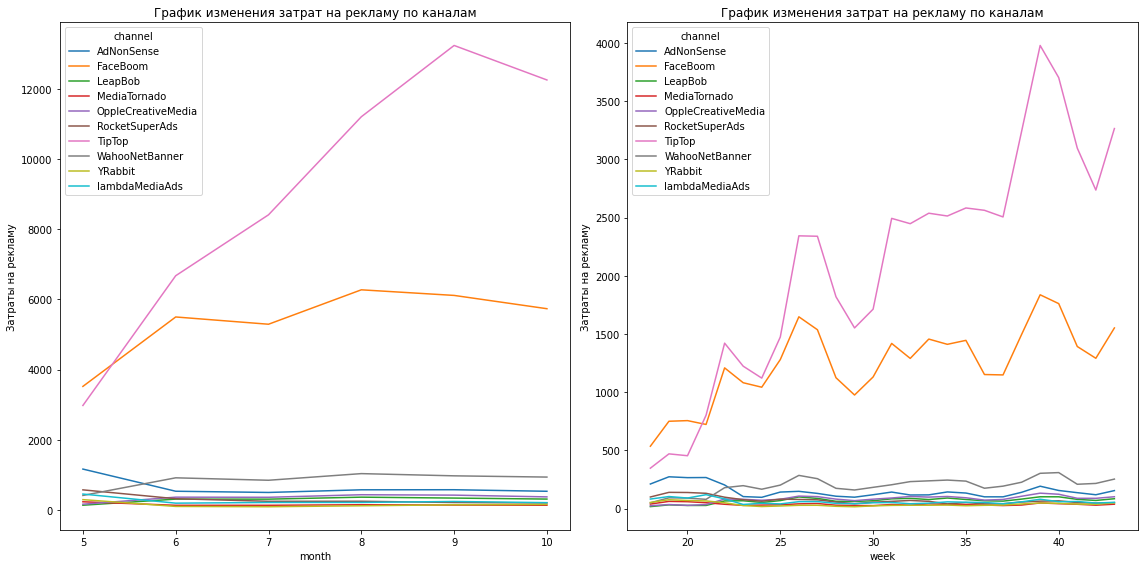

In [24]:
# Визуализируем динамику изменения расходов во времени (по неделям и месяцам) по каждому источнику:

dates = [costs['month'], costs['week']]
plt.figure(figsize=(16, 8))
for i, part in enumerate(dates):
    (
    costs.pivot_table(index=part, columns='channel', values='costs', aggfunc='sum')
         .plot(ax = plt.subplot(1, 2, i + 1))
    )
    plt.title('График изменения затрат на рекламу по каналам')
    plt.ylabel('Затраты на рекламу')
plt.tight_layout() 
plt.show()

<span style="color:blue">График распределения затрат на рекламу по неделям более "шумный", чем график распределения затрат по месяцам. Однако по обоим графикам можно сделать вывод, что затраты на рекламу на платформах Tip Top и FaceBoom значительно больше затрат на рекламу по другим каналам. Затраты на платформе Tip Top в рассматриваемом периоде выросли почти в 4 раза, и стали вдвое превышать затраты на рекламу на платформе Faceboom, которые в свою очередь выросли, но не так сильно, как затраты по платформе Tip Top. Затраты на рекламу по остальным платформам практически не менялись в течение рассматриваемого периода времени.</span>

In [25]:
# 4. Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника, 
# для чего используем профили пользователей:

costs['dt'] = pd.to_datetime(costs['dt']).dt.date
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [26]:
# Определим среднюю стоимость привлечения каждого пользователя по каналам привлечения:

cac_medium = profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values(by = 'acquisition_cost', ascending = False)
profiles_with_out_organic = profiles[profiles['channel'] != 'organic']
cac_medium['diff_with_ac_mean, %'] = round(((cac_medium['acquisition_cost']/
                                           profiles_with_out_organic['acquisition_cost'].mean()) - 1)*100, 2)
display(cac_medium)

,acquisition_cost,"diff_with_ac_mean, %"
channel,,
TipTop,2.799003,148.25
FaceBoom,1.113286,-1.26
AdNonSense,1.008054,-10.59
lambdaMediaAds,0.724802,-35.71
WahooNetBanner,0.602245,-46.58
RocketSuperAds,0.412095,-63.45
OppleCreativeMedia,0.250000,-77.83
YRabbit,0.218975,-80.58
MediaTornado,0.218717,-80.60


<span style="color:blue">Канал Tip Top - явный лидер по стоимости привлечения пользователей, которая в два с половиной раза превышает среднюю стоимость привлечения. По остальным каналам стоимость привлечения ниже средней стоимости привлечения.</span>

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [27]:
# 1. Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков 
# динамики LTV, CAC и ROI, для чего сначала отсечем органических пользователей:

profiles = profiles[profiles['channel'] != 'organic']

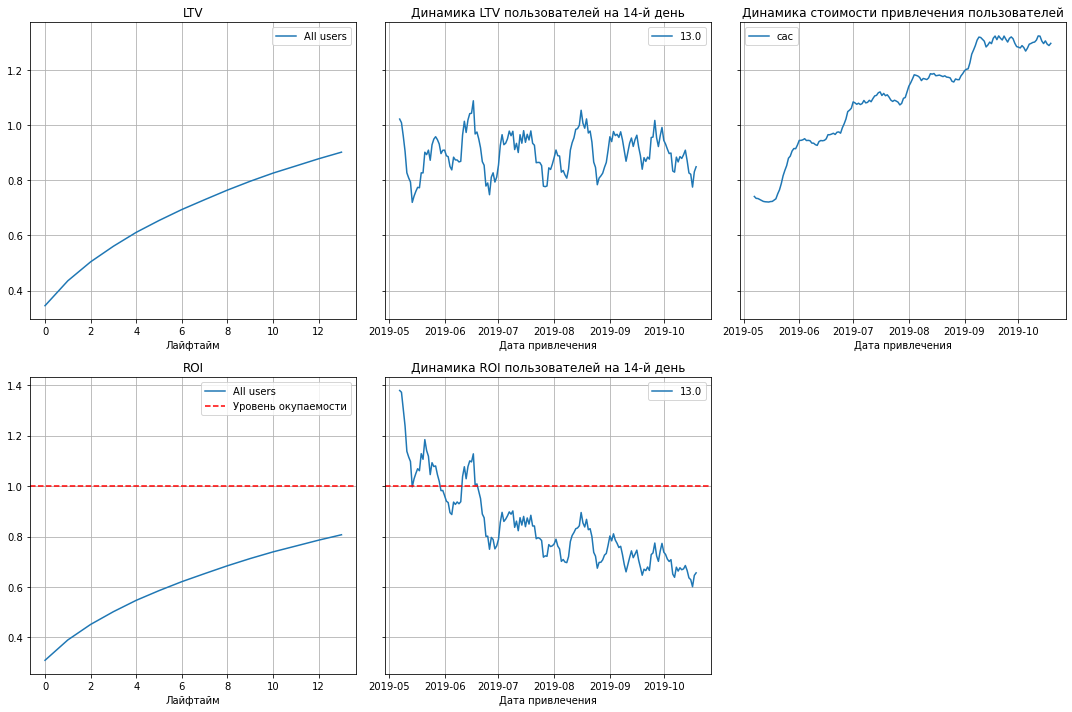

In [28]:
# Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI 
# на дату 01.11.2019 с горизонтом 14 дней:

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    datetime(2019, 11, 1).date(),
    14
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14) 

<span style="color:blue">LTV в динамике сохраняется примерно на одном уровне, а вот CAC повышается, в результате ROI лежит ниже границы окупаемости и в динамике уменьшается. Таким образом, вцелом реклама не окупается.</span>

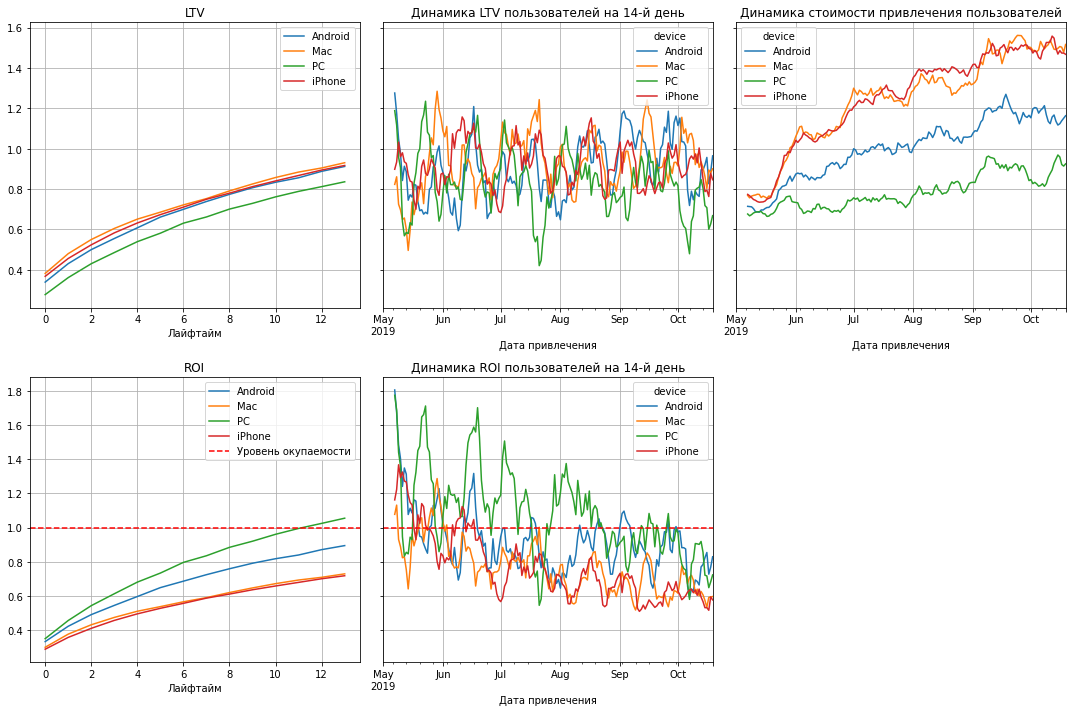

In [29]:
# 2. Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, 
# а также графики динамики LTV, CAC и ROI:

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,    
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['device'],
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

<span style="color:blue">В распределении по устройствам LTV везде примерно одинаковый, однако стоимость привлечения пользователей на Iphone и Mac выше, чем на PC и Android. В результате выше пределов окупаемости находится только PC, Android немного не дотягивает до линии окупаемости, а Iphone и Mac имеют самую низкую окупаемость и не дотягиваются до уровня окупаемости. В динамике ROI уменьшается по всем платформам, самое большое падение у платформы PC.</span>

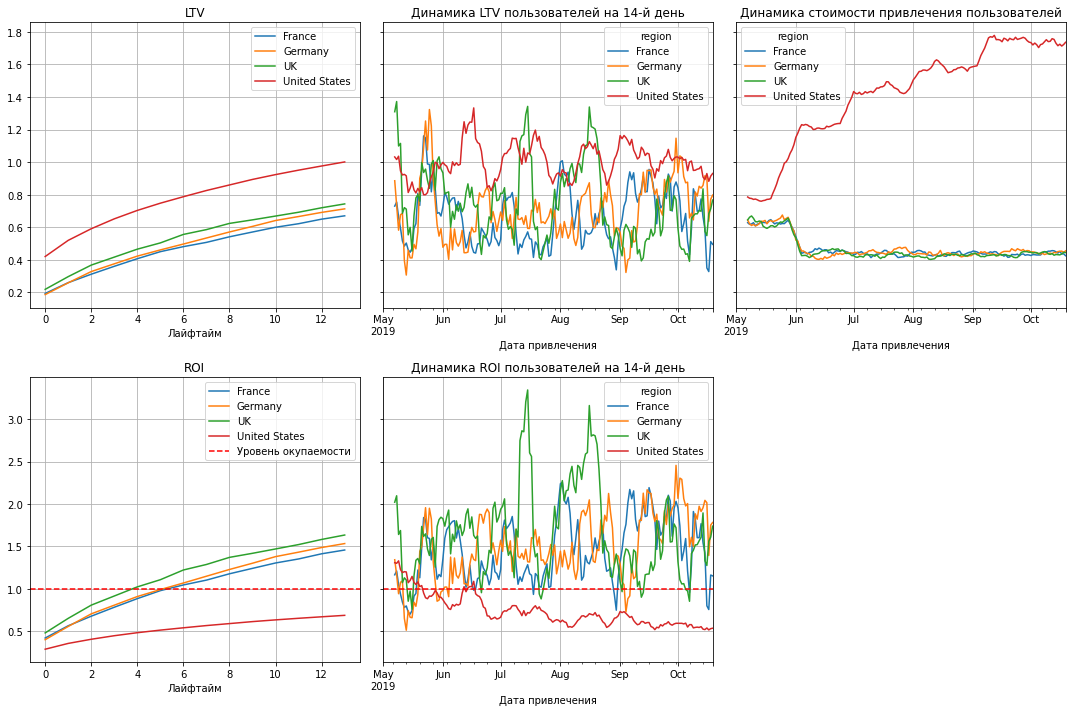

In [30]:
# 3. Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, 
# а также графики динамики LTV, CAC и ROI:

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,    
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['region'],
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

<span style="color:blue">Больше всего привлекается средств в США, однако стоимость привлечения в США также самая высокая - примерно вчетверо больше, чем в других регионах. В результате на графике ROI окупаемость рекламы в США единственная находится ниже предела окупаемости и в динамике наблюдается ее постепенное снижение.</span>

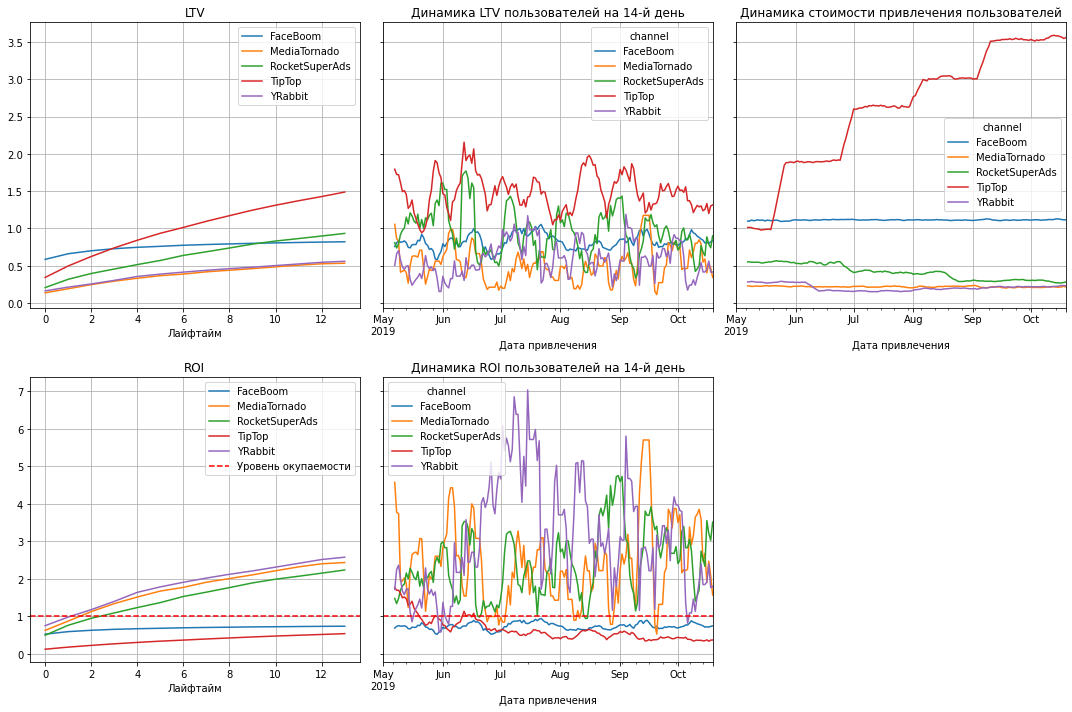

In [31]:
# Отдельно проанализируем окупаемость рекламы в США по каналам привлечения: 
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles[profiles['region'] == 'United States'],
    orders,    
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['channel']
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

<span style="color:blue">В США LTV держится на уровне единицы, при этом стоимость привлечения росла с 0.8 до примерно 1.7. На графике динамики окупаемости видим, что с середины июня окупаемость падает ниже уровня окупаемости и дальше падает вниз.</span>

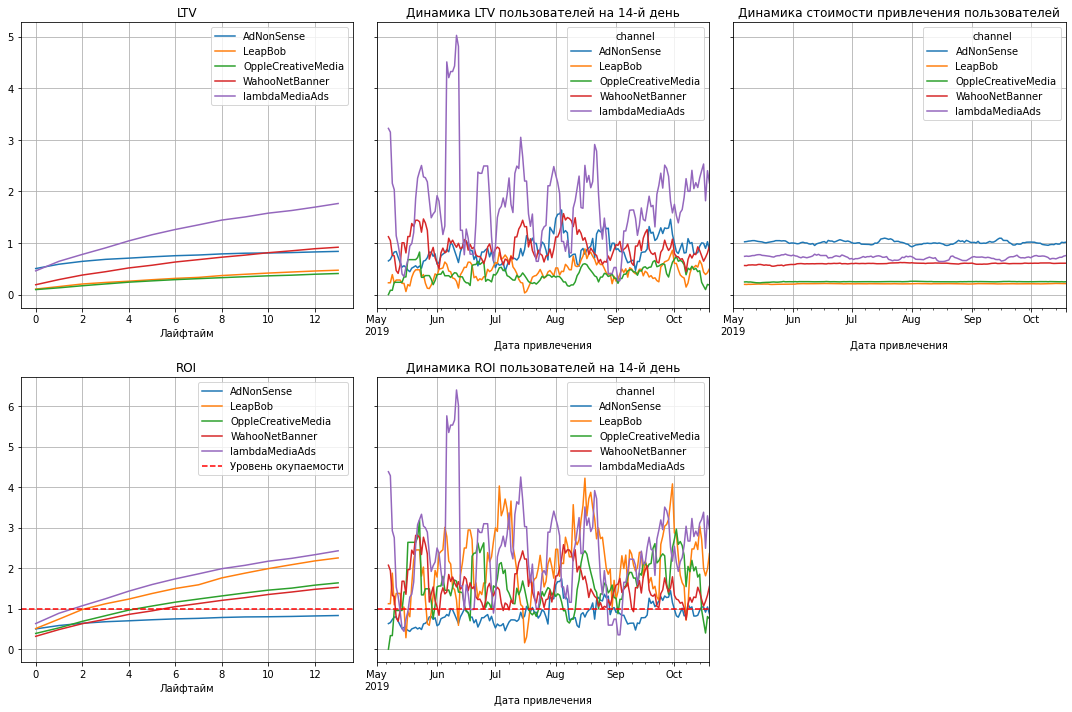

In [32]:
# Отдельно проанализируем окупаемость рекламы в Европе по каналам привлечения: 
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles[profiles['region'] != 'United States'],
    orders,    
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['channel']
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

<span style="color:blue">В Европе по окупаемости свои лидеры: каналы LeapBob, lambdaMediaAds, WahooNetBanner.</span>

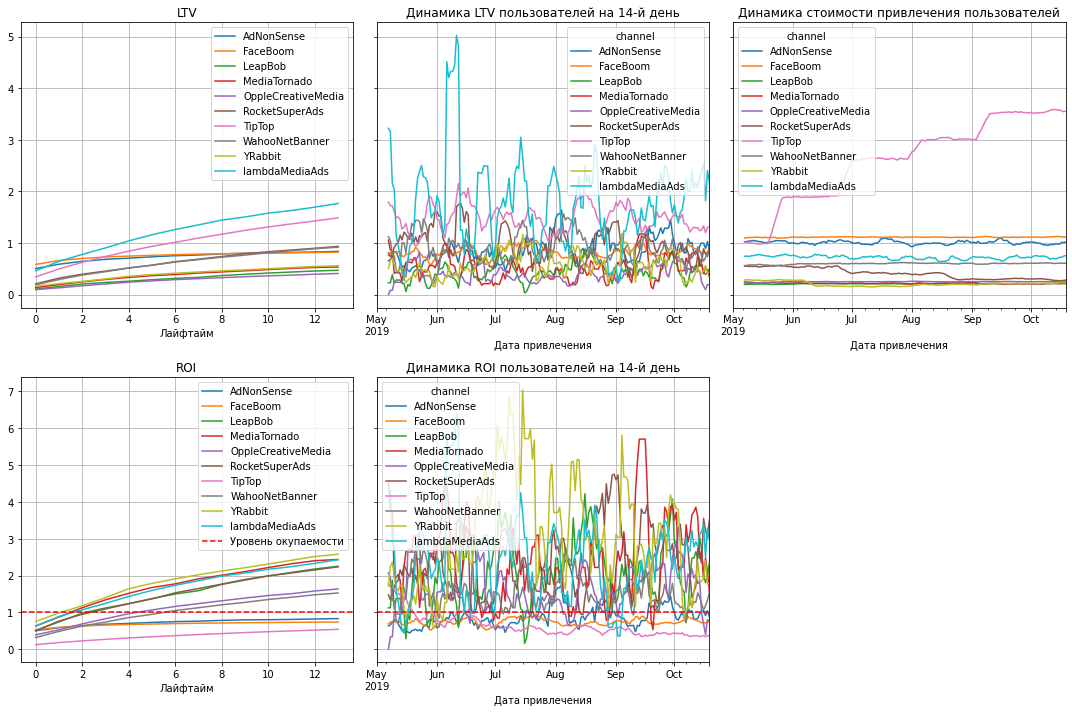

In [33]:
# 4. Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков 
# динамики LTV, CAC и ROI с разбивкой по рекламным каналам: 

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['channel'],
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

<span style="color:blue">Лидер по LTV — платформа lambdaMediaAds, на втором месте платформа TipTop. Cтоимость привлечения пользователей из рекламной сети TipTop непременно росла и достигла трех с половиной единиц. По остальным платформам стоимость привлечения в рассматриваемом периоде не менялась и вцелом не превышала одной единицы. С точки зрения окупаемости лидерами являются платформы YRabbit, MediaTornado, lambdaMediaAds. В свою очередь, платформы Tip Top, FaceBoom и AdNonSense лежат ниже границы окупаемости.</span>

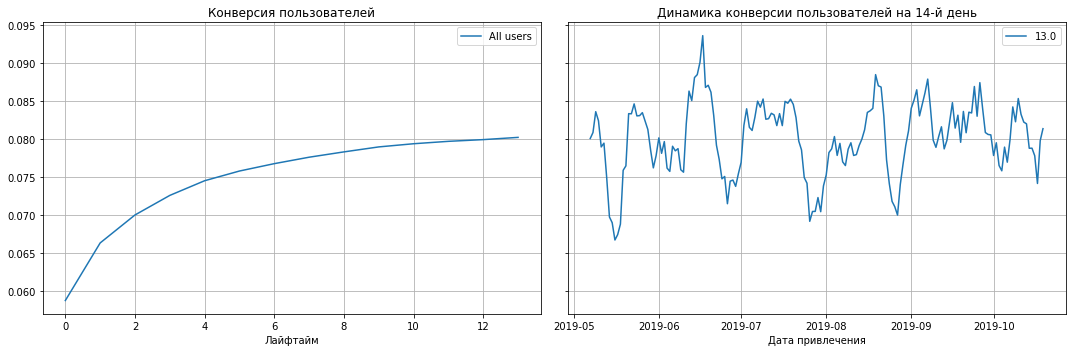

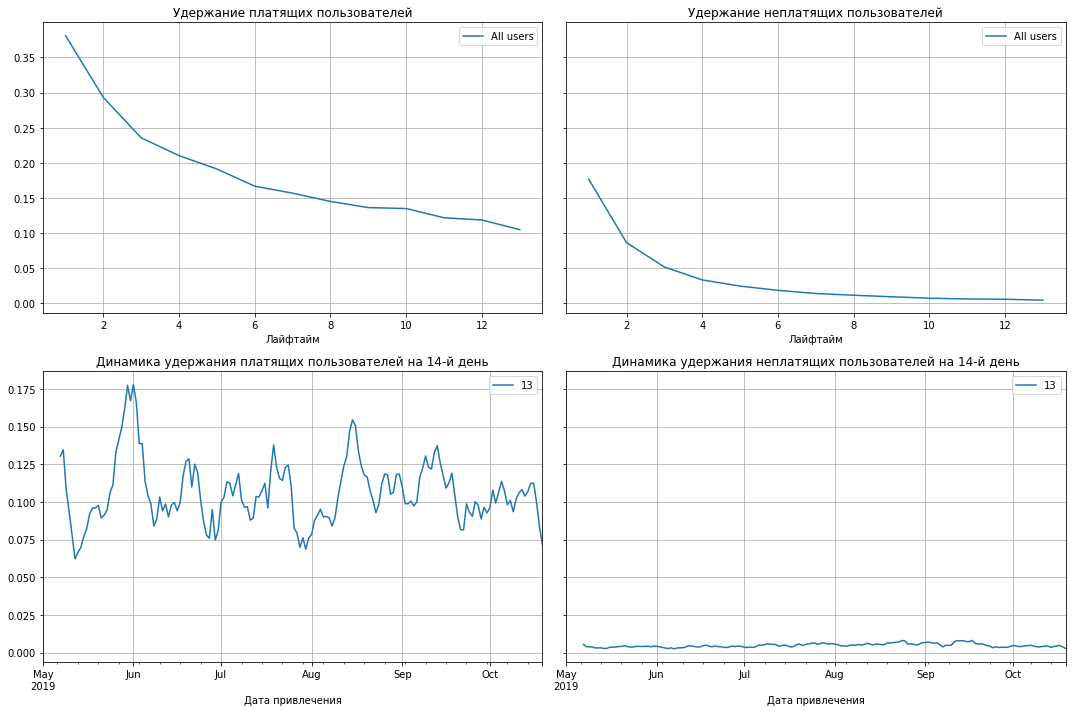

In [34]:
# 5. Проверим общие конверсию пользователей и динамику её изменения:

conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    datetime(2019, 11, 1).date(),
    14
)
plot_conversion(conversion, conversion_history, 14)

# Проверим удержание пользователей и построим график его изменения:

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, 
    visits, 
    datetime(2019, 11, 1).date(), 
    14 
)

plot_retention(retention_grouped, retention_history, 14) 

<span style="color:blue">В динамике конверсия и удержание держатся примерно на одном уровне. Удержание платящих пользователей выше, чем у неплатящих.</span>

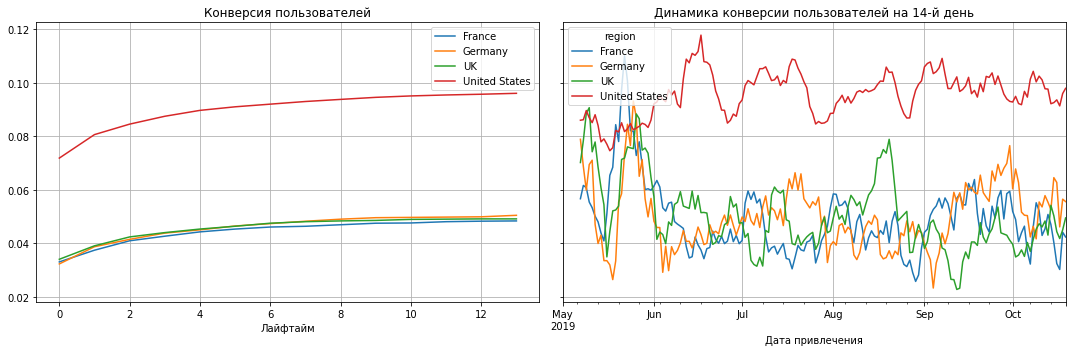

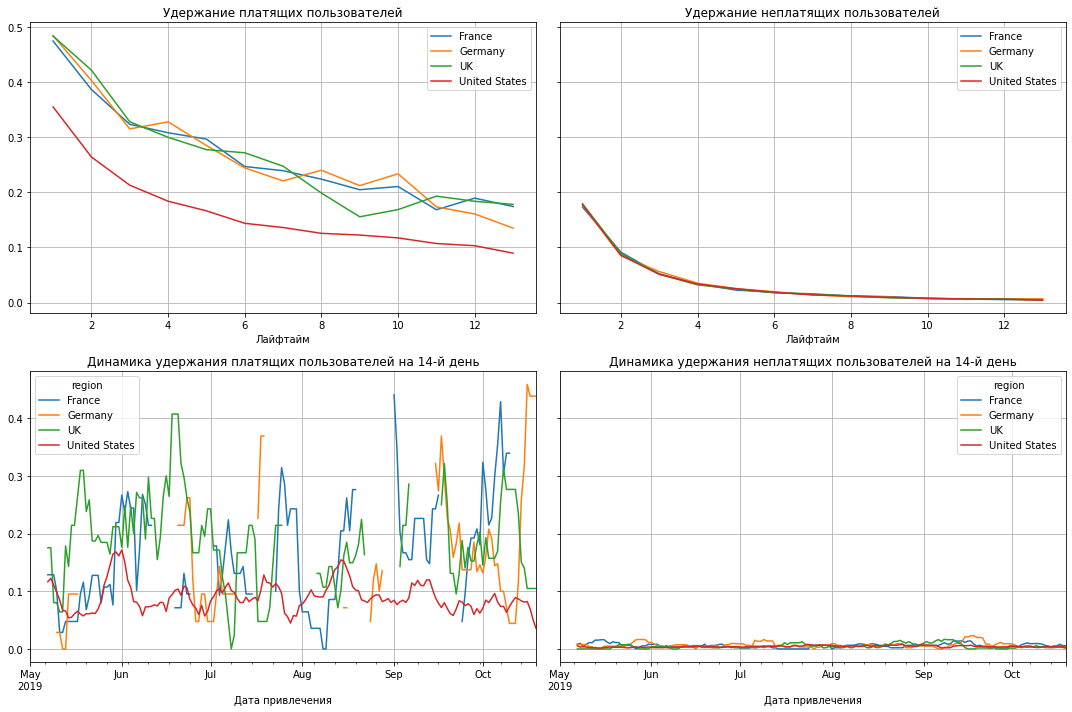

In [35]:
# 6. Проверим конверсию пользователей и динамику её изменения по странам:

conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['region']
)
plot_conversion(conversion, conversion_history, 14)

# Проверим удержание пользователей и построим график его изменения по странам:

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, 
    visits, 
    datetime(2019, 11, 1).date(), 
    14,
    dimensions=['region']
)

plot_retention(retention_grouped, retention_history, 14) 

<span style="color:blue">Конверсия пользователей в США выше, чем в остальных странах, однако удержание ниже. В этом может быть причина неприбыльности США, как региона.</span>

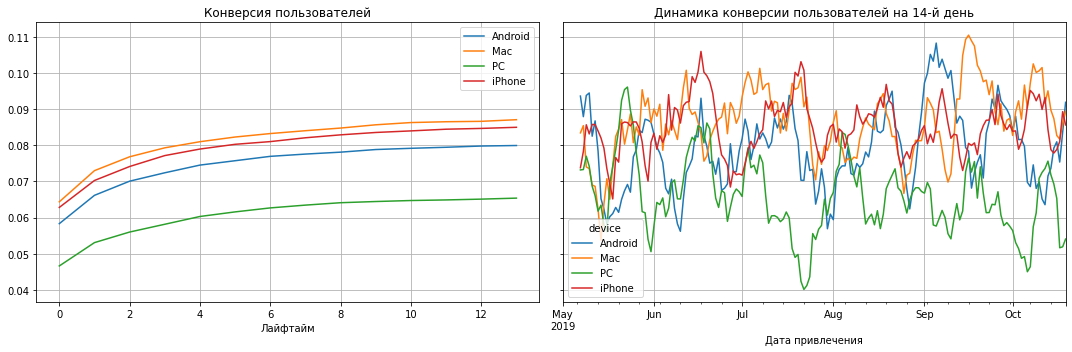

In [ ]:
# 7. Проверим конверсию пользователей и динамику её изменения по устройствам:

conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['device']
)
plot_conversion(conversion, conversion_history, 14)

# Проверим удержание пользователей и построим график его изменения по устройствам:

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, 
    visits, 
    datetime(2019, 11, 1).date(), 
    14,
    dimensions=['device']
)

plot_retention(retention_grouped, retention_history, 14) 

<span style="color:blue">Конверсия на PC ниже, чем на остальных устройствах, на которых конверсия примерно на одном уровне. По динамике удержания все устройства находятся примерно на одном уровне.</span>

In [ ]:
# 8. Проверим конверсию пользователей и динамику её изменения по каналам привлечения:

conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['channel']
)
plot_conversion(conversion, conversion_history, 14)

# Проверим удержание пользователей и построим график его изменения по каналам привлечения:

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, 
    visits, 
    datetime(2019, 11, 1).date(), 
    14,
    dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, 14) 

<span style="color:blue"> Конверсия выше всего на каналах привлечения FaceBoom, AdNonSense, lambdaMediaAds и TipTop. По удержанию хуже всего себя показывают платформы AdNonSense и FaceBoom.</span>

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

<span style="color:blue">
    
Согласно графикам LTV, CAC и ROI можно сделать следующие выводы:
- окупаемость инвестиций в рекламу приложения находится ниже пределов окупаемости;
- конверсия и удержание пользователей в динамике держатся на одном уровне;
- затраты на привлечение пользователей велики и продолжают расти.

Выделим проблемные направления в инвестициях в рекламу:
- США являются самой "платящей" страной, при этом затраты на привлечение пользователей в США вчетверо больше, чем в других странах. Конверсия пользователей в США самая большая, однако удержание пользователей самое низкое из всех стран. В результате, США - единственная "неокупаемая" страна и окупаемость инвестиций продолжает падать;
- Mac и iPhone являются самыми доходными устройствами, при этом стоимость привлечения пользователей по этим устройствам самая высокая. В результате инвестиции по этим устройствам имеют самую низкую окупаемость; 
- Tip Top на ряду с FaceBoom является одним из двух самых популярных каналов привлечения пользователей. При этом затраты на привлечение пользователей с этого канала составляют 52% рекламного бюджета, стоимость привлечения пользователя в два с половиной раза превышает среднюю стоимость привлечения по всем каналам. Однако по удержанию пользователей канал имеет худший показатель и, в результате, находится ниже пределов окупаемости;
- FaceBoom и AdNonSense имеют больше всего "платящих" пользователей среди всех каналов, однако удержание пользователей по этим каналам одно из самых низких, в результате оба канала находятся ниже пределов окупаемости.

Таким образом, ключевыми проблемами в направлениях: регион США, устройства Mac и iPhone, каналы привлечения Tip Top, FaceBoom и AdNonSense являются завышенные затраты на привлечение пользователей и низкое удержание пользователей.

Отделу маркетинга можно предложить перераспределить инвестиции в привлечение пользователей по следующим направлениям:
- перераспределить часть рекламного бюджета из США в Европу;
- внутри США направить часть рекламных средств на окупаемые в США каналы привлечения: MediaTornado, RocketSuperAds, YRabbit;
- перераспределить часть средств с устройств Mac и iPhone на менее неокупаемые устройства Android и PC;
- направить часть рекламных средств на окупаемые в Европе каналы привлечения: LeapBob, lambdaMediaAds, WahooNetBanner.

</span> 